In [3]:
!pip install opencv-python
!pip install numpy
!pip install pandas
!pip install matplotlib

import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files
from matplotlib.pyplot import imshow
import matplotlib.patches as patches
from google.colab.patches import cv2_imshow
from io import BytesIO

In [30]:
gorsel_yolu = files.upload()

Saving avuc.png to avuc (2).png
Saving kumas.png to kumas.png
Saving tas.png to tas.png


In [43]:
gorsel_avuc = cv2.imread("avuc.png")
gorsel_kumas = cv2.imread("kumas.png")
gorsel_tas = cv2.imread("tas.png")

In [59]:
# RGB ve Griye dönüştür
gorsel_rgb_avuc = cv2.cvtColor(gorsel_avuc, cv2.COLOR_BGR2RGB)
gorsel_gri_avuc = cv2.cvtColor(gorsel_avuc, cv2.COLOR_BGR2GRAY)

gorsel_rgb_kumas = cv2.cvtColor(gorsel_kumas, cv2.COLOR_BGR2RGB)
gorsel_gri_kumas = cv2.cvtColor(gorsel_kumas, cv2.COLOR_BGR2GRAY)

gorsel_rgb_tas = cv2.cvtColor(gorsel_tas, cv2.COLOR_BGR2RGB)
gorsel_gri_tas = cv2.cvtColor(gorsel_tas, cv2.COLOR_BGR2GRAY)

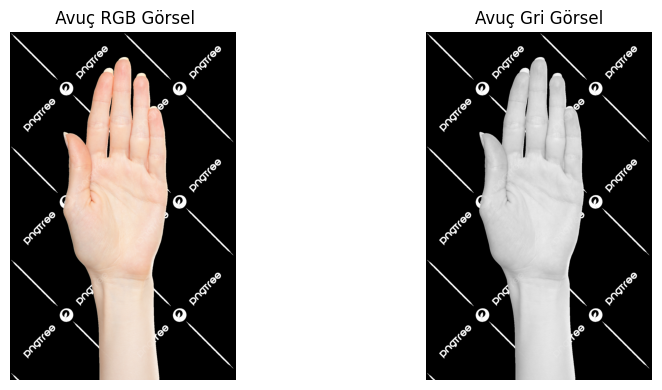

In [60]:
#Görseli göster
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(gorsel_rgb_avuc)
plt.title(" Avuç RGB Görsel")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gorsel_gri_avuc, cmap='gray')
plt.title("Avuç Gri Görsel")
plt.axis('off')

plt.tight_layout()
plt.show()

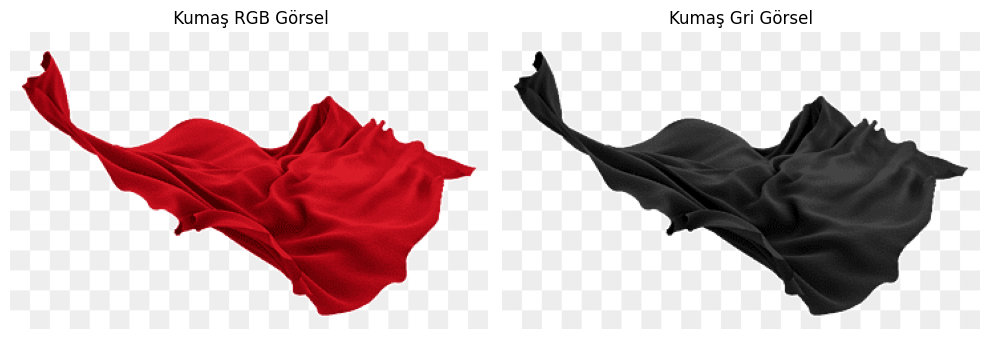

In [61]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(gorsel_rgb_kumas)
plt.title(" Kumaş RGB Görsel")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gorsel_gri_kumas, cmap='gray')
plt.title("Kumaş Gri Görsel")
plt.axis('off')

plt.tight_layout()
plt.show()

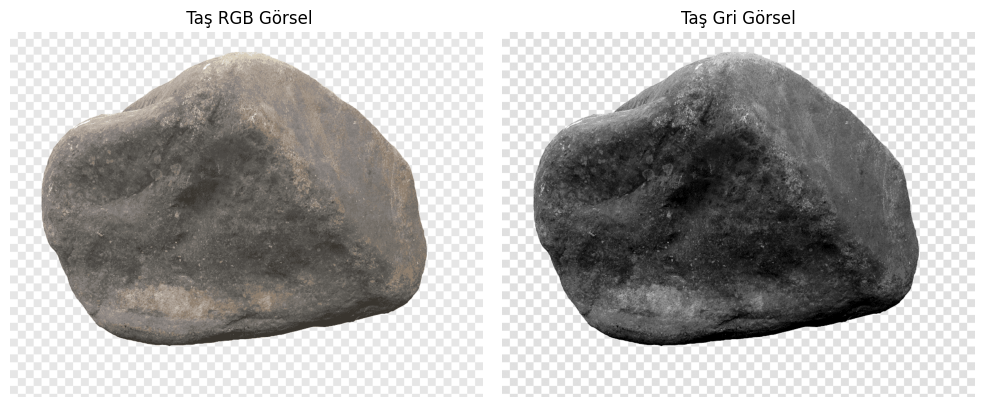

In [62]:
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(gorsel_rgb_tas)
plt.title(" Taş RGB Görsel")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gorsel_gri_tas, cmap='gray')
plt.title("Taş Gri Görsel")
plt.axis('off')

plt.tight_layout()
plt.show()

In [63]:
import pandas as pd

veri = []

for isim, yol in zip(["Avuç", "Kumaş", "Taş"], [gorsel_gri_avuc, gorsel_gri_kumas, gorsel_gri_tas]):
    glcm = graycomatrix(yol,
                        distances=[1],
                        angles=[0],
                        levels=256,
                        symmetric=True,
                        normed=True)
    veri.append({
        "İsim": isim,
        "Kontrast": graycoprops(glcm, 'contrast')[0,0],
        "Enerji": graycoprops(glcm, 'energy')[0,0],
        "Homojenlik": graycoprops(glcm, 'homogeneity')[0,0],
        "Korelasyon": graycoprops(glcm, 'correlation')[0,0],
    })

df = pd.DataFrame(veri)
print(df)

    İsim    Kontrast    Enerji  Homojenlik  Korelasyon
0   Avuç  444.930440  0.669936    0.859877    0.978754
1  Kumaş  189.014823  0.454900    0.809837    0.987766
2    Taş  106.472358  0.347474    0.717840    0.989030


In [ ]:
# KNN İLE DOKU SINIFLANDIRMASI

In [64]:
# veri hazırlama
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
# özellikler ve etiketler
x = df[["Kontrast", "Enerji", "Homojenlik", "Korelasyon"]]
y = df["İsim"]

In [66]:
# etiketleri sayisallastir
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [67]:
# eğitim ve test verisine ayır ( eğer 3 örnek varsa tüm veriyle eğiteceğiz. )
x_train, x_test, y_train, y_test = x, x, y_encoded, y_encoded
#

In [ ]:
# KNN MODELİNİ EĞİT VE TAHMİN ET

In [68]:
# KNN modelini oluştur
model = KNeighborsClassifier(n_neighbors=1)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
# Tahmin yap
y_pred = model.predict(x_test)

In [70]:
# sonucları değerlendir
print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("\nClassification Report: \n", classification_report(y_test, y_pred))

Confusion Matrix: 
 [[1 0 0]
 [0 1 0]
 [0 0 1]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [ ]:
# GLCM ISI HARİTASI İLE KARŞILAŞTIRILMASI